In [ ]:
!conda install -y pandas
!conda install -y seaborn
!conda install -y scikit-learn
!conda install -y statsmodels
!conda install -y seaborn
!conda install -y nbconvert
import pandas as pd
from sklearn import linear_model
import statsmodels.api
import seaborn as sns 
import glob
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import svm
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import paired_ttest_kfold_cv
from sklearn.utils import shuffle
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [3]:

filenames = glob.glob('data_2019/*.csv')
li = []
for filename in filenames: 
    df = pd.read_csv(filename, index_col=None, header=0)
    filename = filename.replace('data_2019/', "")
    filename = filename.replace('.csv', '')
    df['Day'] = filename
    df.rename(columns= {'Day' : 'Team Name'}, inplace= True)
    df['Week'] = range(1, len(df) + 1)
    li.append(df)

team_stats_init = pd.concat(li, axis= 0, ignore_index=True)

team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('opp',case = False)],axis = 1, inplace = True)


team_stats_init = team_stats_init.rename(columns = {team_stats_init.columns[5]: "ScoredPoints", team_stats_init.columns[6]: "FirstDowns", team_stats_init.columns[10]: "TurnoversAllowed",team_stats_init.columns[11] : "FirstAllowed", team_stats_init.columns[12] : "YardsAllowed", team_stats_init.columns[12]: "YardsAllowed", team_stats_init.columns[13]: "PassYardsAllowed", team_stats_init.columns[14]: "RushingYardsAllowed", team_stats_init.columns[15]: "Turnovers"})
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('Date',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('Rec',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('OT',case = False)],axis = 1, inplace = True)
team_stats_init = team_stats_init.iloc[:, :12]
team_stats_init.to_csv(r"data_for_models/full_dataframe.csv")
team_stats_init.head(34)







Week Team Name  ScoredPoints  FirstDowns  PassY  RushY  TurnoversAllowed  \
0      1  Steelers           3.0        15.0  276.0   32.0               1.0   
1      2  Steelers          26.0        17.0  180.0   81.0               1.0   
2      3  Steelers          20.0        11.0  160.0   79.0               2.0   
3      4  Steelers          27.0        20.0  260.0   66.0               1.0   
4      5  Steelers          23.0        18.0  192.0   77.0               2.0   
5      6  Steelers          24.0        18.0  132.0  124.0               1.0   
6      7  Steelers           NaN         NaN    NaN    NaN               NaN   
7      8  Steelers          27.0        21.0  236.0  158.0               1.0   
8      9  Steelers          26.0        17.0  183.0   90.0               2.0   
9     10  Steelers          17.0        15.0  231.0   42.0               2.0   
10    11  Steelers           7.0        18.0  178.0   58.0               4.0   
11    12  Steelers          16.0        16.0  179.0  159.0               1.0   
12    13  Steelers          20.0        18.0  199.0  124.0               1.0   
13    14  Steelers          23.0        20.0  135.0  140.0               2.0   
14    15  Steelers          10.0        15.0  178.0   51.0               5.0   
15    16  Steelers          10.0        16.0  185.0   75.0               2.0   
16    17  Steelers          10.0        10.0   77.0   91.0               2.0   
17     1  Patriots          33.0        24.0  366.0   99.0               NaN   
18     2  Patriots          43.0        27.0  255.0  124.0               1.0   
19     3  Patriots          30.0        21.0  313.0   68.0               2.0   
20     4  Patriots          16.0        11.0  150.0   74.0               1.0   
21     5  Patriots          33.0        23.0  312.0  130.0               1.0   
22     6  Patriots          35.0        27.0  313.0  114.0               2.0   
23     7  Patriots          33.0        22.0  249.0   74.0               1.0   
24     8  Patriots          27.0        19.0  239.0   79.0               NaN   
25     9  Patriots          20.0        22.0  268.0   74.0               2.0   
26    10  Patriots           NaN         NaN    NaN    NaN               NaN   
27    11  Patriots          17.0        19.0  224.0   74.0               NaN   
28    12  Patriots          13.0        17.0  181.0  101.0               NaN   
29    13  Patriots          22.0        29.0  303.0  145.0               1.0   
30    14  Patriots          16.0        17.0  184.0   94.0               1.0   
31    15  Patriots          34.0        19.0  116.0  175.0               NaN   
32    16  Patriots          24.0        23.0  271.0  143.0               1.0   
33    17  Patriots          24.0        18.0  217.0  135.0               2.0   

    FirstAllowed  YardsAllowed  PassYardsAllowed  RushingYardsAllowed  \
0           24.0         465.0             366.0                 99.0   
1           25.0         425.0             274.0                151.0   
2           26.0         436.0             268.0                168.0   
3           16.0         175.0             102.0                 73.0   
4           22.0         277.0             139.0                138.0   
5           23.0         348.0             316.0                 32.0   
6            NaN           NaN               NaN                  NaN   
7           16.0         230.0             170.0                 60.0   
8           22.0         328.0             189.0                139.0   
9           16.0         306.0             218.0                 88.0   
10          17.0         293.0             189.0                104.0   
11          11.0         244.0             158.0                 86.0   
12          19.0         279.0             173.0                106.0   
13          17.0         236.0             165.0                 71.0   
14          17.0         261.0             131.0                130.0   
15          14.0         259.0     

In [4]:
for col in team_stats_init.iloc[:, 3:].columns:
    
    lin_reg_test =statsmodels.formula.api.ols(formula="ScoredPoints ~ {}".format(col), data=team_stats_init).fit()
    print(lin_reg_test.summary())




                            OLS Regression Results                            
Dep. Variable:           ScoredPoints   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     261.1
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.01e-47
Time:                        19:29:07   Log-Likelihood:                -1807.0
No. Observations:                 512   AIC:                             3618.
Df Residuals:                     510   BIC:                             3627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2316      1.532     -0.804      0.4

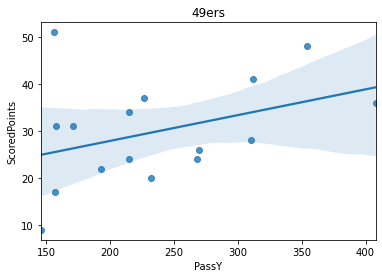

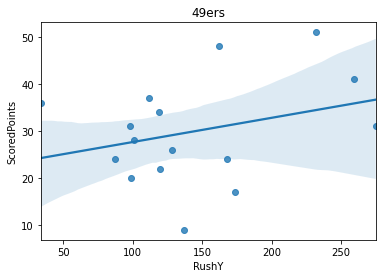

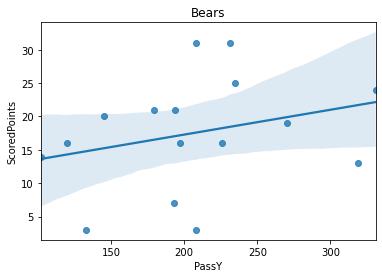

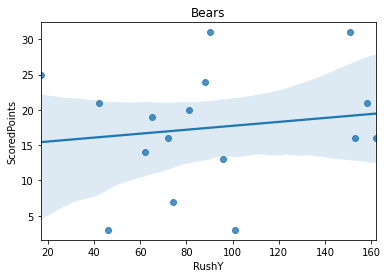

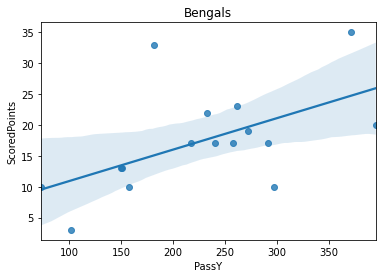

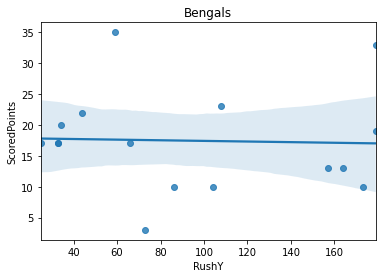

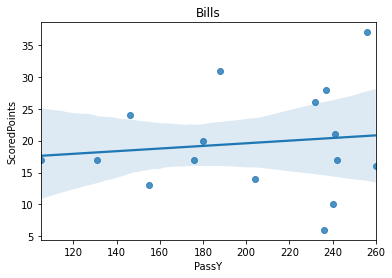

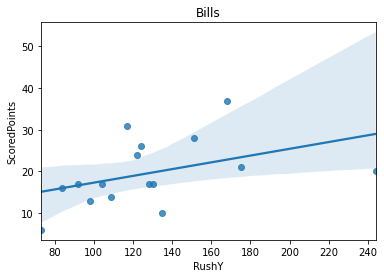

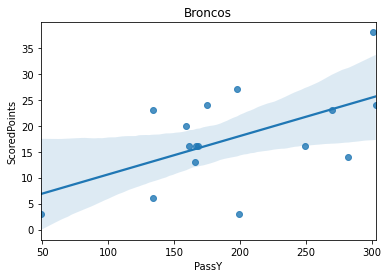

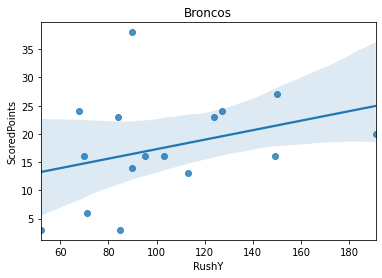

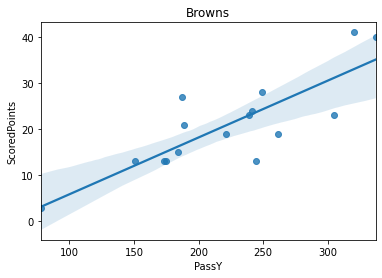

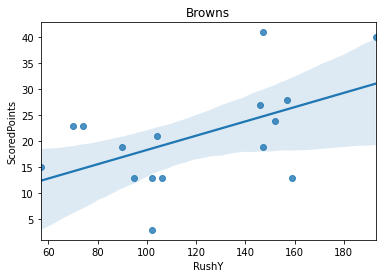

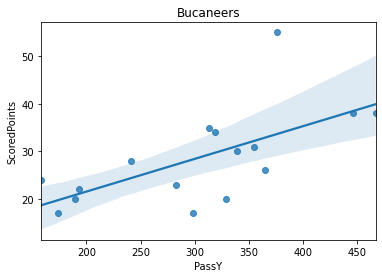

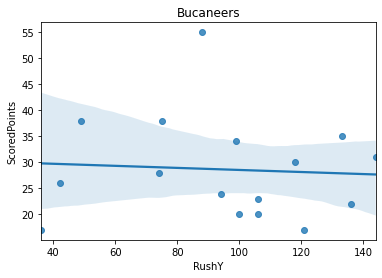

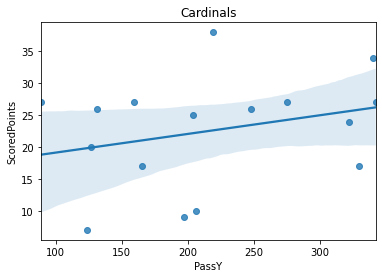

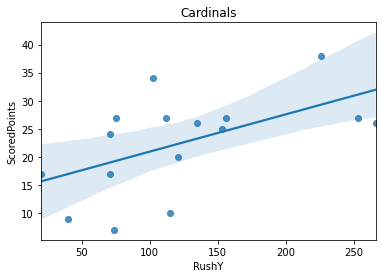

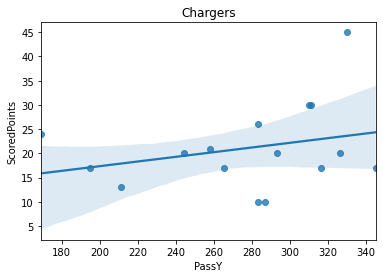

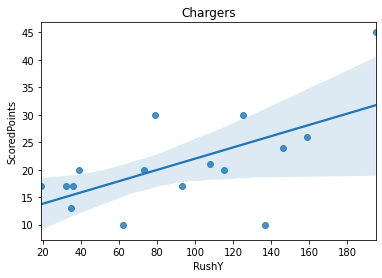

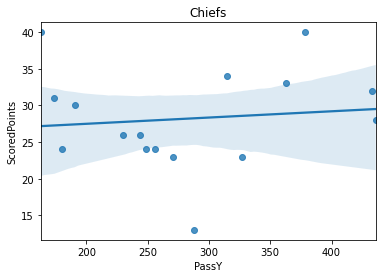

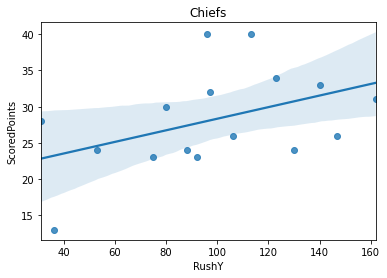

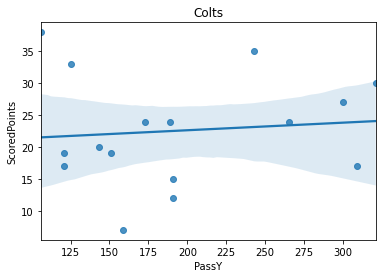

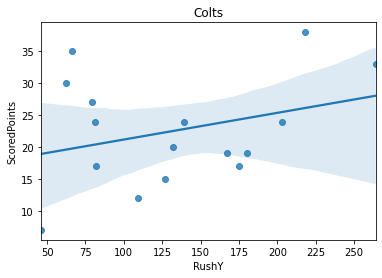

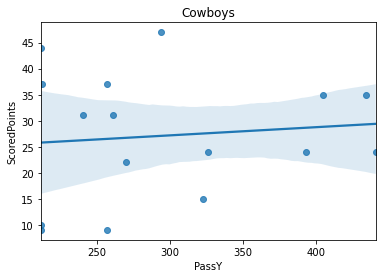

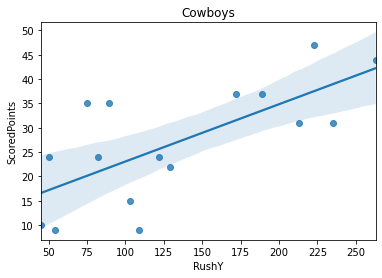

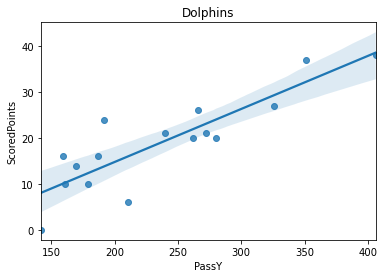

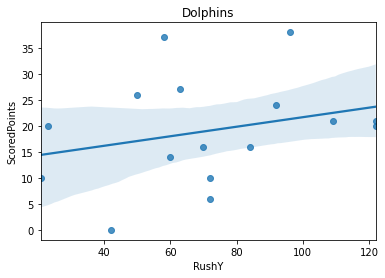

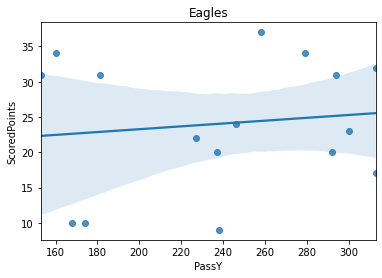

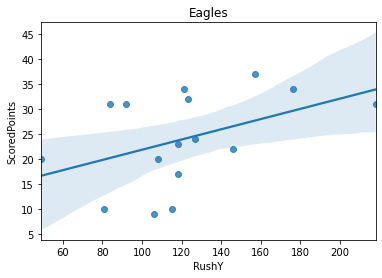

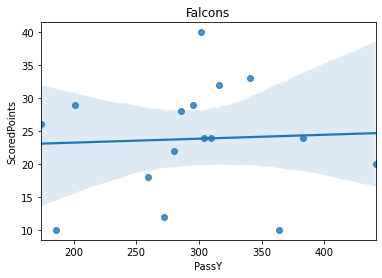

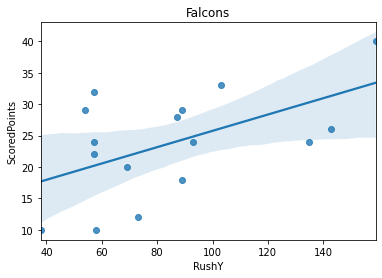

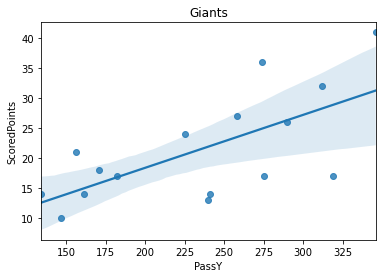

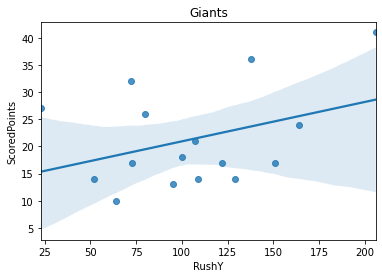

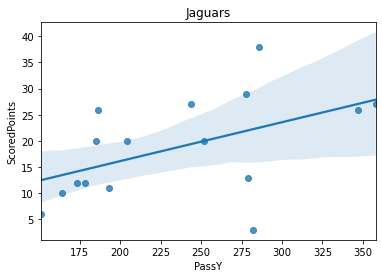

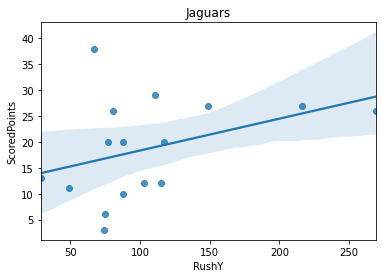

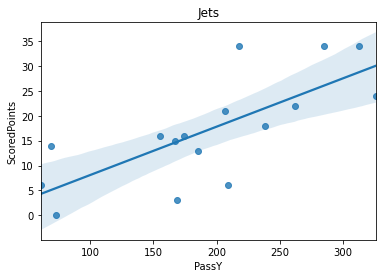

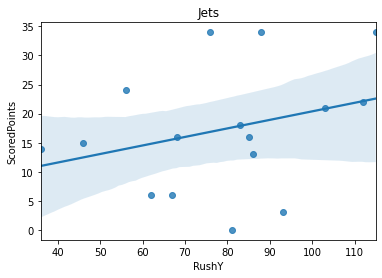

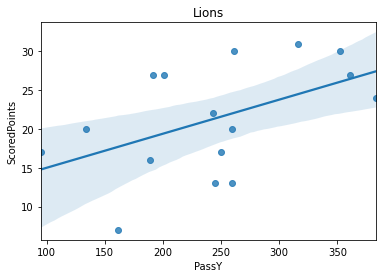

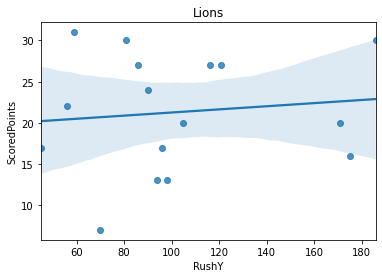

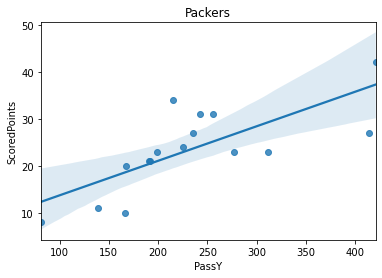

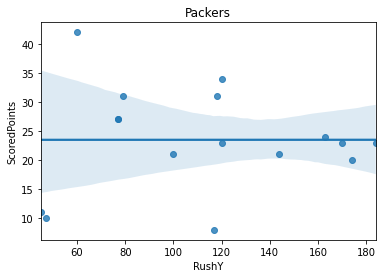

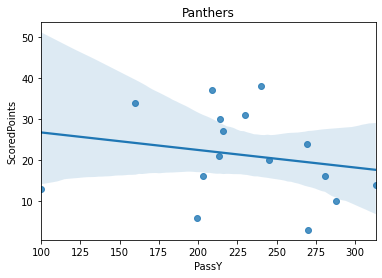

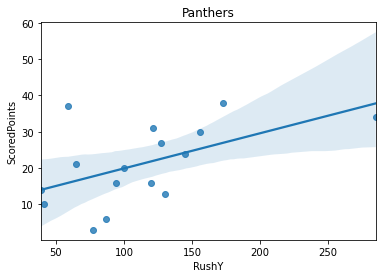

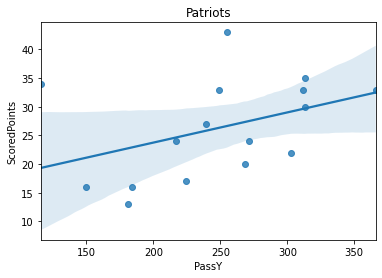

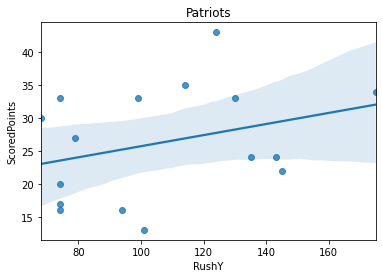

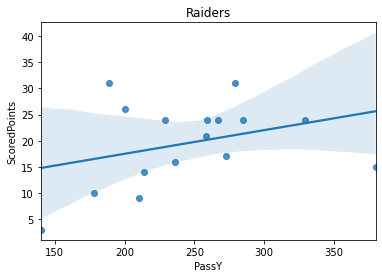

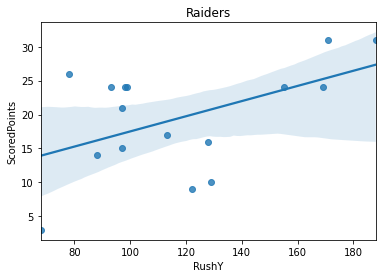

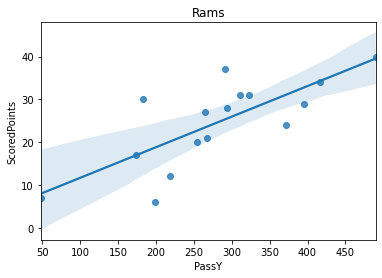

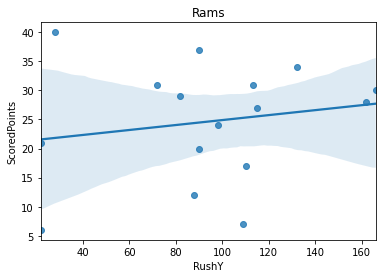

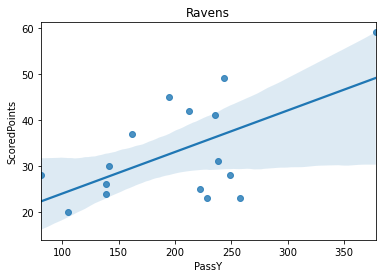

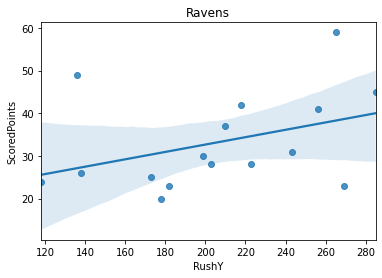

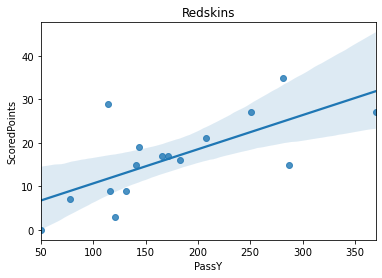

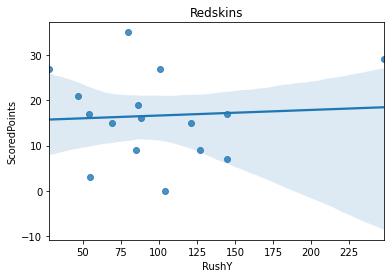

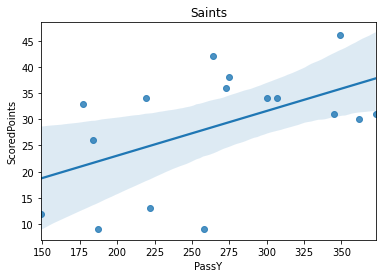

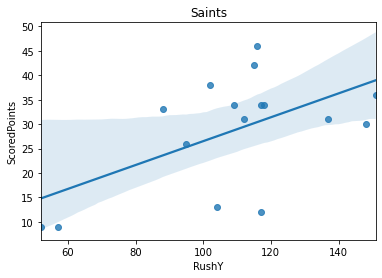

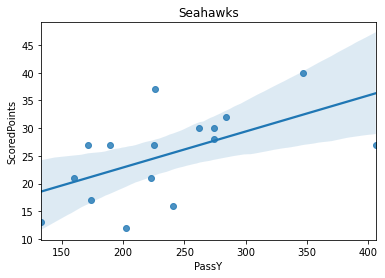

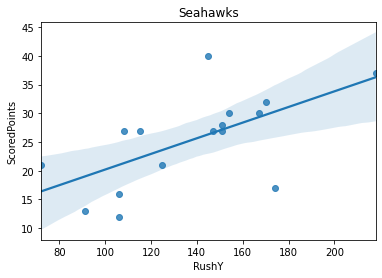

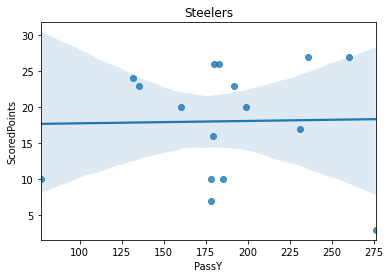

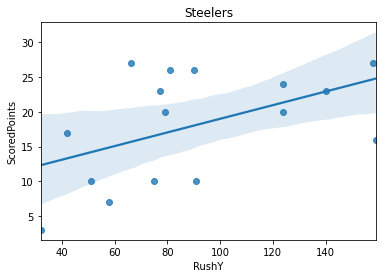

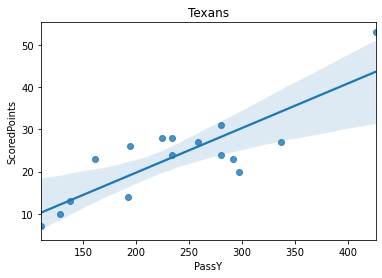

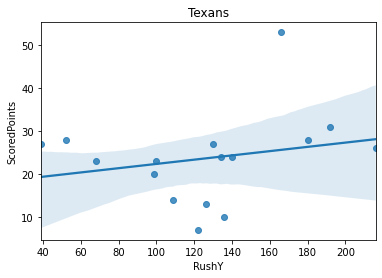

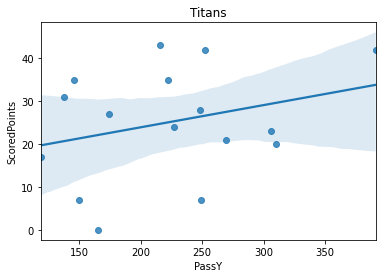

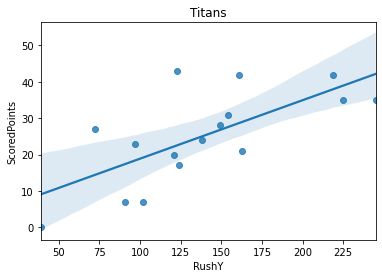

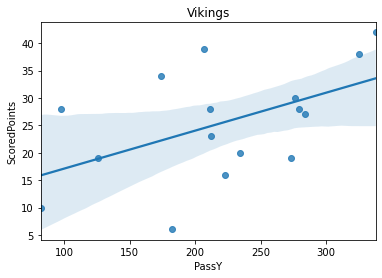

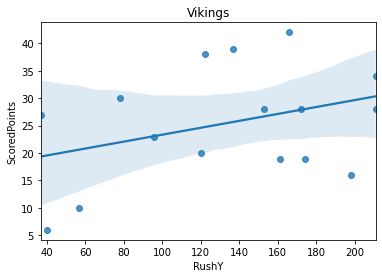

In [5]:
#Plotting variables that have high correlation to scoring
cnt = 1
for title, group in team_stats_init.groupby('Team Name'):
    plt.figure(cnt)
    sns.regplot(x= 'PassY', y= 'ScoredPoints', data= group)
    plt.title(title)
    cnt += 1
    plt.figure(cnt)
    sns.regplot(x= 'RushY', y= 'ScoredPoints', data= group)
    plt.title(title)
    cnt += 1





Text(0.5, 1.0, 'Points Scored vs Rushing Yards Allowed Across All NFL Teams in the 2019 Season')

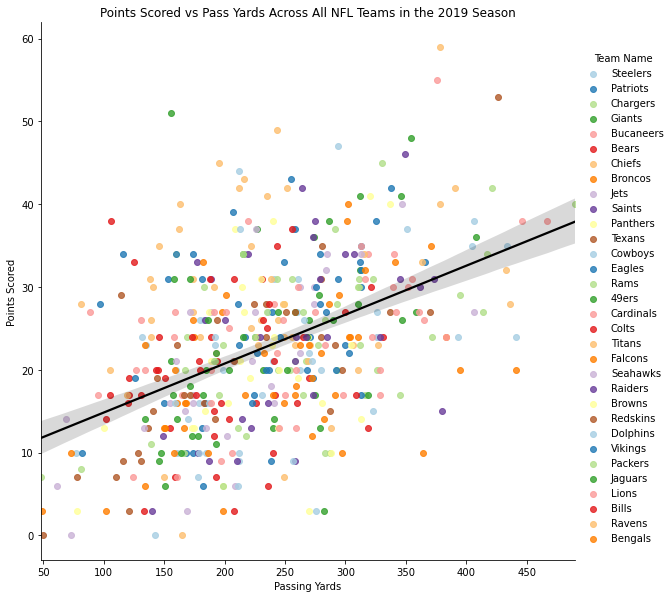

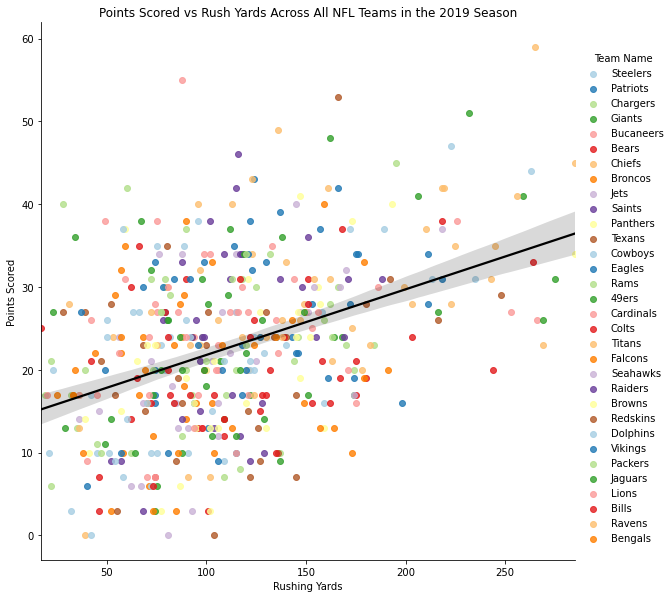

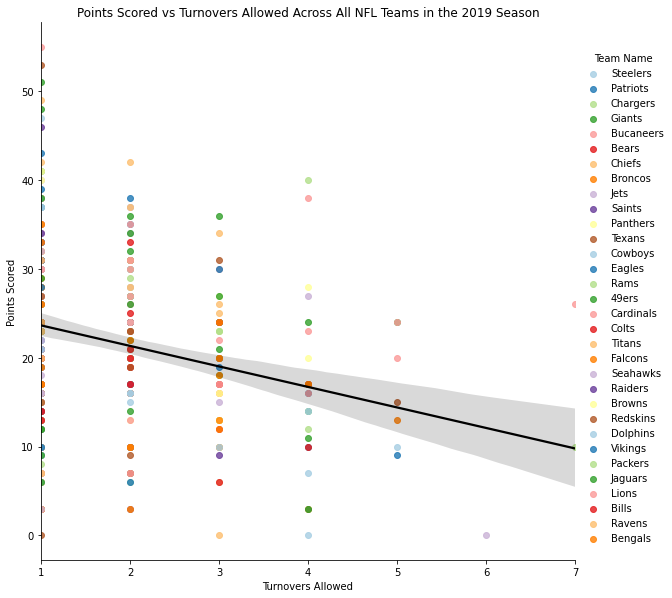

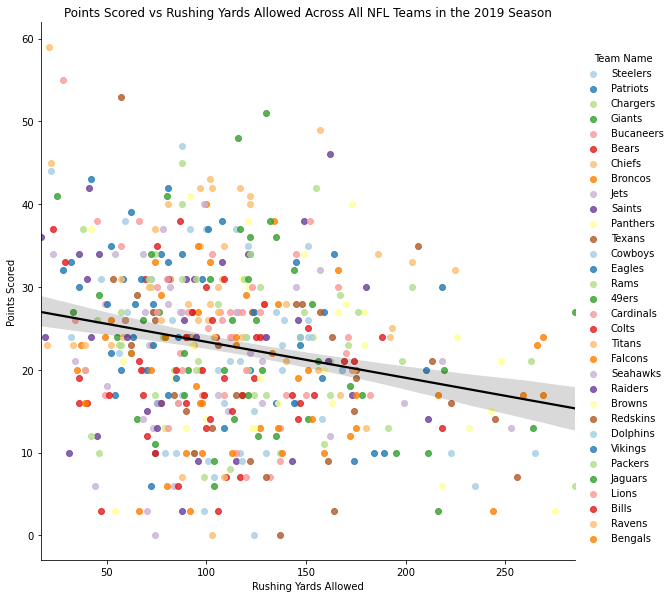

In [6]:
#Plotting combined statistics across all teams

Pass_Yards = sns.lmplot(x= 'PassY', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="PassY", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Pass_Yards.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Passing Yards")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Pass Yards Across All NFL Teams in the 2019 Season")

Rush_Yards = sns.lmplot(x= 'RushY', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="RushY", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Rush_Yards.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Rushing Yards")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Rush Yards Across All NFL Teams in the 2019 Season")

Turnovers_Allowed = sns.lmplot(x= 'TurnoversAllowed', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="TurnoversAllowed", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Turnovers_Allowed.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Turnovers Allowed")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Turnovers Allowed Across All NFL Teams in the 2019 Season")

Rushing_Yards_Allowed = sns.lmplot(x= 'RushingYardsAllowed', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="RushingYardsAllowed", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Rushing_Yards_Allowed.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Rushing Yards Allowed")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Rushing Yards Allowed Across All NFL Teams in the 2019 Season")


In [7]:
test_train_data = pd.DataFrame(columns=['Team Name', 'Scored Points', 'Expected Pass Yards'])
for title, group in team_stats_init.groupby('Team Name'):
  
    series = group.iloc[:, 4:5]
    values = pd.DataFrame(series.values)
    averages = {}
    lst = []
    add_to_subset = {}
    for index in range(values.shape[0]):
        if index > 0:
            ele = values.iloc[:index, :].mean(numeric_only= True)
            lst.append(ele.values[0])
        else:
            lst.append(0)

    averages[0] = lst
    averages = pd.DataFrame(averages)
    averages.replace(0, np.nan, inplace=True)
    averages.columns = ['Expected Pass Yards']

    add_to_subset['Team Name'] = [title] * 17
    add_to_subset = pd.DataFrame(add_to_subset, columns = ["Team Name"])
    add_to_subset['Scored Points'] = group['ScoredPoints'].values
    add_to_subset['Expected Pass Yards'] = averages['Expected Pass Yards']
    
    test_train_data = pd.concat([test_train_data, add_to_subset], ignore_index = True)
    
    



In [8]:
rushing_column = pd.DataFrame(columns= ["Expected Rushing Yards"])
for title, group in team_stats_init.groupby('Team Name'):
  
    series = group.iloc[:, 5:6]
    values = pd.DataFrame(series.values)
    averages = {}
    lst = []
    add_to_subset = {}
    for index in range(values.shape[0]):
        if index > 0:
            ele = values.iloc[:index, :].mean(numeric_only= True)
            lst.append(ele.values[0])
        else:
            lst.append(0)

    averages[0] = lst
    averages = pd.DataFrame(averages)
    averages.replace(0, np.nan, inplace=True)
    averages.columns = ['Expected Rushing Yards']
    add_to_subset['Expected Rushing Yards'] = averages['Expected Rushing Yards'].values
    
    add_to_subset = pd.DataFrame(add_to_subset, columns = ["Expected Rushing Yards"])

    rushing_column = pd.concat([rushing_column, add_to_subset])
    

test_train_data["Expected Rushing Yards"] = rushing_column['Expected Rushing Yards'].values



In [9]:
rushing_column = pd.DataFrame(columns= ["Expected Turnovers Allowed"])
for title, group in team_stats_init.groupby('Team Name'):
  
    series = group.iloc[:, 6:7]
    values = pd.DataFrame(series.values)
    averages = {}
    lst = []
    add_to_subset = {}
    for index in range(values.shape[0]):
        if index > 0:
            ele = values.iloc[:index, :].mean(numeric_only= True)
            lst.append(ele.values[0])
        else:
            lst.append(0)

    averages[0] = lst
    averages = pd.DataFrame(averages)
    averages.replace(0, np.nan, inplace=True)
    averages.columns = ['Expected Turnovers Allowed']
    add_to_subset['Expected Turnovers Allowed'] = averages['Expected Turnovers Allowed'].values
    
    add_to_subset = pd.DataFrame(add_to_subset, columns = ["Expected Turnovers Allowed"])

    rushing_column = pd.concat([rushing_column, add_to_subset])
    

test_train_data["Expected Turnovers Allowed"] = rushing_column['Expected Turnovers Allowed'].values

In [10]:
rushing_column = pd.DataFrame(columns= ["Expected Rushing Yards Allowed"])
for title, group in team_stats_init.groupby('Team Name'):
  
    series = group.iloc[:, 10:11]
    values = pd.DataFrame(series.values)
    averages = {}
    lst = []
    add_to_subset = {}
    for index in range(values.shape[0]):
        if index > 0:
            ele = values.iloc[:index, :].mean(numeric_only= True)
            lst.append(ele.values[0])
        else:
            lst.append(0)

    averages[0] = lst
    averages = pd.DataFrame(averages)
    averages.replace(0, np.nan, inplace=True)
    averages.columns = ['Expected Rushing Yards Allowed']
    add_to_subset['Expected Rushing Yards Allowed'] = averages['Expected Rushing Yards Allowed'].values
    
    add_to_subset = pd.DataFrame(add_to_subset, columns = ["Expected Rushing Yards Allowed"])

    rushing_column = pd.concat([rushing_column, add_to_subset])
    

test_train_data["Expected Rushing Yards Allowed"] = rushing_column['Expected Rushing Yards Allowed'].values
test_train_data.to_csv(r"data_for_models/test_train_data.csv")
test_train_data.head(17)

Team Name  Scored Points  Expected Pass Yards  Expected Rushing Yards  \
0      49ers           31.0                  NaN                     NaN   
1      49ers           41.0           158.000000               98.000000   
2      49ers           24.0           235.000000              178.500000   
3      49ers            NaN           246.000000              175.000000   
4      49ers           31.0           246.000000              175.000000   
5      49ers           20.0           227.250000              200.000000   
6      49ers            9.0           228.200000              179.800000   
7      49ers           51.0           214.500000              172.666667   
8      49ers           28.0           206.142857              181.142857   
9      49ers           24.0           219.125000              171.125000   
10     49ers           36.0           218.666667              161.777778   
11     49ers           37.0           237.600000              149.000000   
12     49ers           17.0           236.636364              145.636364   
13     49ers           48.0           230.000000              148.000000   
14     49ers           22.0           239.538462              149.076923   
15     49ers           34.0           236.214286              147.000000   
16     49ers           26.0           234.800000              145.133333   

    Expected Turnovers Allowed  Expected Rushing Yards Allowed  
0                          NaN                             NaN  
1                     2.000000                      121.000000  
2                     1.500000                       73.000000  
3                     2.666667                       75.000000  
4                     2.666667                       75.000000  
5                     2.666667                       81.750000  
6                     2.500000                       87.200000  
7                     2.200000                       90.000000  
8                     2.000000                       95.714286  
9                     2.000000                      102.875000  
10                    2.142857                      107.777778  
11                    2.125000                      110.500000  
12                    2.125000                      111.090909  
13                    2.000000                      116.666667  
14                    1.900000                      116.615385  
15                    1.909091                      114.642857  
16                    1.916667                      111.800000

In [42]:
test_train_data.fillna(test_train_data.mean(), inplace=True)


X = test_train_data[["Expected Pass Yards", "Expected Rushing Yards", "Expected Turnovers Allowed", "Expected Rushing Yards Allowed"]]
y = np.ravel(test_train_data[['Scored Points']])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
clf = RandomForestRegressor(max_depth=1000, random_state=1)

clf.fit(X_train, y_train)
score_train = mean_squared_error(y_test, clf.predict(X_test))

print(score_train)



89.50317158558929


Text(0.5, 1.0, 'Predicted Score vs. Expected Score')

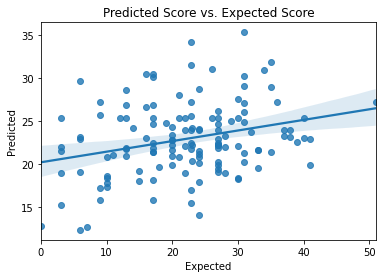

In [43]:
p1 = sns.regplot(x = y_test, y= clf.predict(X_test))
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Predicted Score vs. Expected Score")

In [44]:
final_df = pd.DataFrame(columns= ["ExpectedPointsScored", "ActualPointsScored"])
final_df['ExpectedPointsScored'] = clf.predict(X_test)
final_df['ActualPointsScored'] = y_test
lin_reg_test = statsmodels.formula.api.ols(formula="ExpectedPointsScored ~ ActualPointsScored", data=final_df).fit()
print(lin_reg_test.summary())

                             OLS Regression Results                             
Dep. Variable:     ExpectedPointsScored   R-squared:                       0.081
Model:                              OLS   Adj. R-squared:                  0.074
Method:                   Least Squares   F-statistic:                     11.75
Date:                  Thu, 17 Dec 2020   Prob (F-statistic):           0.000807
Time:                          20:09:57   Log-Likelihood:                -382.51
No. Observations:                   136   AIC:                             769.0
Df Residuals:                       134   BIC:                             774.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

In [40]:
final_df.head(20)


ExpectedPointsScored  ActualPointsScored
0              14.140521             24.0000
1              31.840000             35.0000
2              22.986875             27.0000
3              18.202188             17.0000
4              22.822510             20.0000
5              19.958125             20.0000
6              21.972717              3.0000
7              19.920000             27.0000
8              17.050000             22.8125
9              15.277917              3.0000
10             21.509350             24.0000
11             20.802708             10.0000
12             18.438125             30.0000
13             29.700000              6.0000
14             19.560625             33.0000
15             20.290771             27.0000
16             21.848625             27.0000
17             28.950000             35.0000
18             22.056094             28.0000
19             21.734870             22.8125